In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import glob
import os

#Data Set Merging

In [ ]:

# Define the directory containing the CSV files
directory = "/content/drive/MyDrive/Panasonic_18650PF_Data/Panasonic 18650PF Data/25degC/EIS"

# Use glob to find all CSV files in the directory
csv_files = glob.glob(os.path.join(directory, "*.csv"))

# Read and concatenate all CSV files into one dataframe
combined_df = pd.concat([pd.read_csv(file) for file in csv_files], ignore_index=True)

# Save the combined dataframe to a new CSV file
combined_csv_path = os.path.join(directory, "combined_Panasonic_18650PF_data_25deg.csv")
combined_df.to_csv(combined_csv_path, index=False)

# Display the path of the combined CSV file
combined_csv_path


'/content/drive/MyDrive/Panasonic_18650PF_Data/Panasonic 18650PF Data/25degC/EIS/combined_Panasonic_18650PF_data_25deg.csv'

In [ ]:
# import pandas as pd
# import glob
# import os

# # Define the directory containing the CSV files
# directory = ""

# # Use glob to find all CSV files in the directory
# csv_files = glob.glob(os.path.join(directory, "*.csv"))

# # Read and concatenate all CSV files into one dataframe
# combined_df = pd.concat([pd.read_csv(file) for file in csv_files], ignore_index=True)

# # Define the path to save the combined CSV in Google Drive
# combined_csv_path = "/content/drive/MyDrive/Panasonic_18650PF_Data/combined/combined_Panasonic_18650PF_data.csv"

# # Save the combined dataframe to the specified path
# combined_df.to_csv(combined_csv_path, index=False)

# # Confirm the file has been saved
# print(f"Combined CSV file saved to: {combined_csv_path}")


In [ ]:
#merging combined files
# import pandas as pd

# # Define file paths for the uploaded combined CSVs with different temperatures
# temp_file_paths = {
#     "/mnt/data/combined_Panasonic_18650PF_data_-20deg.csv": -20,
#     "/mnt/data/combined_Panasonic_18650PF_data_-10deg.csv": -10,
#     "/mnt/data/combined_Panasonic_18650PF_data_0deg.csv": 0,
#     "/mnt/data/combined_Panasonic_18650PF_data_10deg.csv": 10,
#     "/mnt/data/combined_Panasonic_18650PF_data_25deg.csv": 25
# }

# # Create an empty list to hold dataframes
# dataframes = []

# # Read each CSV, add a temperature column, and append to the list
# for file_path, temperature in temp_file_paths.items():
#     df = pd.read_csv(file_path)
#     df['Temperature_degC'] = temperature
#     dataframes.append(df)

# # Concatenate all dataframes into one
# combined_temperature_df = pd.concat(dataframes, ignore_index=True)

# # Save the new combined dataframe with temperature information to a CSV file
# combined_temp_csv_path = "/mnt/data/combined_Panasonic_18650PF_data_with_temperature.csv"
# combined_temperature_df.to_csv(combined_temp_csv_path, index=False)

# # Display the path of the new combined CSV file
# combined_temp_csv_path


#Pre-processing

In [ ]:
# Load the combined data with temperature information
final_df = pd.read_csv("/content/drive/MyDrive/Panasonic_18650PF_Data/final.csv")

# Display initial information about the dataframe
initial_info = final_df.info()

# 1. Remove any duplicate rows if present
final_df = final_df.drop_duplicates()

# 2. Handle missing values (if any) by forward filling
final_df = final_df.fillna(method='ffill')

# 3. Correct data types for columns if needed
# Convert TimeStamp to datetime if it is not already
if 'TimeStamp' in final_df.columns:
    final_df['TimeStamp'] = pd.to_datetime(final_df['TimeStamp'], errors='coerce')

# 4. Create new columns for any derived data if necessary
# Example: Calculate the cumulative Ah (Amp-hour) if it is not already present
if 'Ah' in final_df.columns and 'Cumulative_Ah' not in final_df.columns:
    final_df['Cumulative_Ah'] = final_df['Ah'].cumsum()

# 5. Standardize column names to lowercase with underscores
final_df.columns = [col.lower().replace(" ", "_") for col in final_df.columns]

# Save the pre-processed data to a new CSV file
preprocessed_csv_path = "/content/drive/MyDrive/Panasonic_18650PF_Data/preprocessed_final.csv"
final_df.to_csv(preprocessed_csv_path, index=False)

# Show initial information and preprocessed CSV path
preprocessed_csv_path, initial_info


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4580 entries, 0 to 4579
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Measurement ID;3914  790 non-null    object
 1   Temperature_degC     4580 non-null   int64 
 2   Measurement ID;3740  711 non-null    object
 3   Measurement ID;3623  903 non-null    object
 4   Measurement ID;3576  1030 non-null   object
 5   Measurement ID;3541  1146 non-null   object
dtypes: int64(1), object(5)
memory usage: 214.8+ KB


<ipython-input-10-6c78b489b442>:11: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  final_df = final_df.fillna(method='ffill')


('/content/drive/MyDrive/Panasonic_18650PF_Data/preprocessed_final.csv', None)

In [ ]:
print(final_df.head(5))


                measurement_id;3914  temperature_degc measurement_id;3740  \
0     Battery name;NCR18650PF_SN002               -20                 NaN   
1                  Battery Name;NCR               -20                 NaN   
2                   Circuit;Circ006               -20                 NaN   
3  Program;458 - Pan_5pulse_EIS_0dC               -20                 NaN   
4   Start Time;6/28/2017 9:12:23 AM               -20                 NaN   

  measurement_id;3623 measurement_id;3576 measurement_id;3541  
0                 NaN                 NaN                 NaN  
1                 NaN                 NaN                 NaN  
2                 NaN                 NaN                 NaN  
3                 NaN                 NaN                 NaN  
4                 NaN                 NaN                 NaN  


In [ ]:
# import pandas as pd
# from sklearn.preprocessing import StandardScaler

# # Load the pre-processed data
# final_df = pd.read_csv("/content/drive/MyDrive/Panasonic_18650PF_Data/v1_preprocessed_final.csv")

# # Handle missing values using forward fill and backward fill
# final_df = final_df.ffill().bfill()

# # Convert non-numeric columns to appropriate data types or drop them if not needed
# # Let's drop the non-numeric columns causing issues for correlation
# non_numeric_cols = final_df.select_dtypes(include='object').columns
# final_df_numeric = final_df.drop(columns=non_numeric_cols)

# # Standard scaling for numerical columns
# scaler = StandardScaler()
# final_df_numeric = pd.DataFrame(scaler.fit_transform(final_df_numeric), columns=final_df_numeric.columns)

# # Correlation analysis with numerical columns only
# correlation_matrix = final_df_numeric.corr()

# # Save the cleaned and transformed data back to CSV
# processed_csv_path = "/content/drive/MyDrive/Panasonic_18650PF_Data/processed_final_cleaned.csv"
# final_df_numeric.to_csv(processed_csv_path, index=False)

# # Display the path of the cleaned CSV file and correlation matrix
# processed_csv_path, correlation_matrix


('/content/drive/MyDrive/Panasonic_18650PF_Data/processed_final_cleaned.csv',
                   temperature_degc
 temperature_degc               1.0)

#Further analysis

In [ ]:
correct_data_path = "/content/drive/MyDrive/Panasonic_18650PF_Data/v1_preprocessed_final.csv"
correct_df = pd.read_csv(correct_data_path)

initial_info_correct = correct_df.info()
initial_info_correct


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3283 entries, 0 to 3282
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   measurement_id;3914  3283 non-null   object
 1   temperature_degc     3283 non-null   int64 
 2   measurement_id;3740  2709 non-null   object
 3   measurement_id;3623  2191 non-null   object
 4   measurement_id;3576  1552 non-null   object
 5   measurement_id;3541  810 non-null    object
dtypes: int64(1), object(5)
memory usage: 154.0+ KB


In [ ]:
# For columns with measurement IDs, fill missing values with a placeholder
correct_df[['measurement_id;3740', 'measurement_id;3623', 'measurement_id;3576', 'measurement_id;3541']] = correct_df[['measurement_id;3740', 'measurement_id;3623', 'measurement_id;3576', 'measurement_id;3541']].fillna('unknown')

# Verify if there are any remaining missing values
missing_values_after_cleanup = correct_df.isnull().sum()
cleaned_correct_csv_path = "/content/drive/MyDrive/Panasonic_18650PF_Data/v2_preprocessed_final.csv"
correct_df.to_csv(cleaned_correct_csv_path, index=False)
cleaned_correct_csv_path, missing_values_after_cleanup


('/content/drive/MyDrive/Panasonic_18650PF_Data/v2_preprocessed_final.csv',
 measurement_id;3914    0
 temperature_degc       0
 measurement_id;3740    0
 measurement_id;3623    0
 measurement_id;3576    0
 measurement_id;3541    0
 dtype: int64)

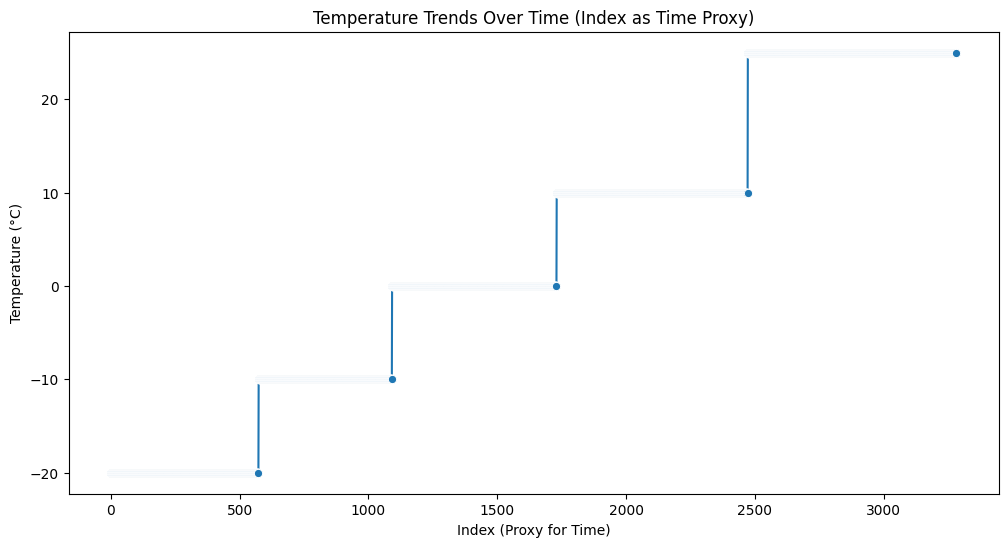

In [ ]:
# Converted 'measurement_id' columns to datetime if applicable, and sort by time
# However, in this dataset, we only have IDs without specific time data. Assuming we can use index as time.
import seaborn as sns
# Line plot of 'temperature_degc' over index as a proxy for time
plt.figure(figsize=(12, 6))
sns.lineplot(x=correct_df.index, y='temperature_degc', data=correct_df, marker='o')
plt.title('Temperature Trends Over Time (Index as Time Proxy)')
plt.xlabel('Index (Proxy for Time)')
plt.ylabel('Temperature (°C)')
plt.show()
# Here we show a trend of temperature changes over the index sequence of the dataset.


<Figure size 1200x1000 with 0 Axes>

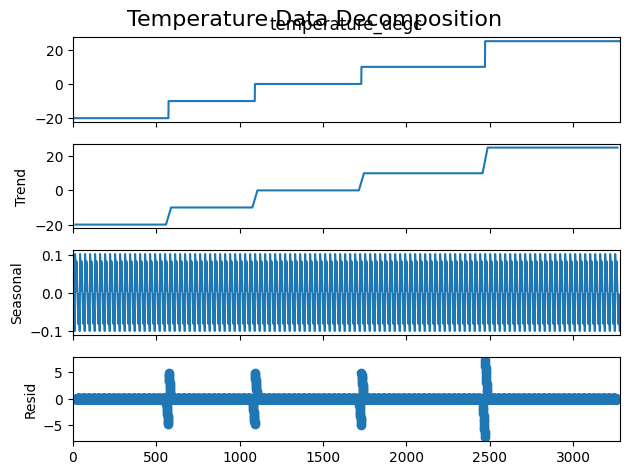

In [ ]:
import statsmodels.api as sm

# Decompose the temperature data to show trend, seasonality, and residuals
temperature_series = correct_df['temperature_degc']

# Using index as a proxy for time, we'll assume a daily frequency (this is for illustrative purposes)
decomposition = sm.tsa.seasonal_decompose(temperature_series, model='additive', period=30)

# Plot the decomposition
plt.figure(figsize=(12, 10))
decomposition.plot()
plt.suptitle('Temperature Data Decomposition', fontsize=16)
plt.show()


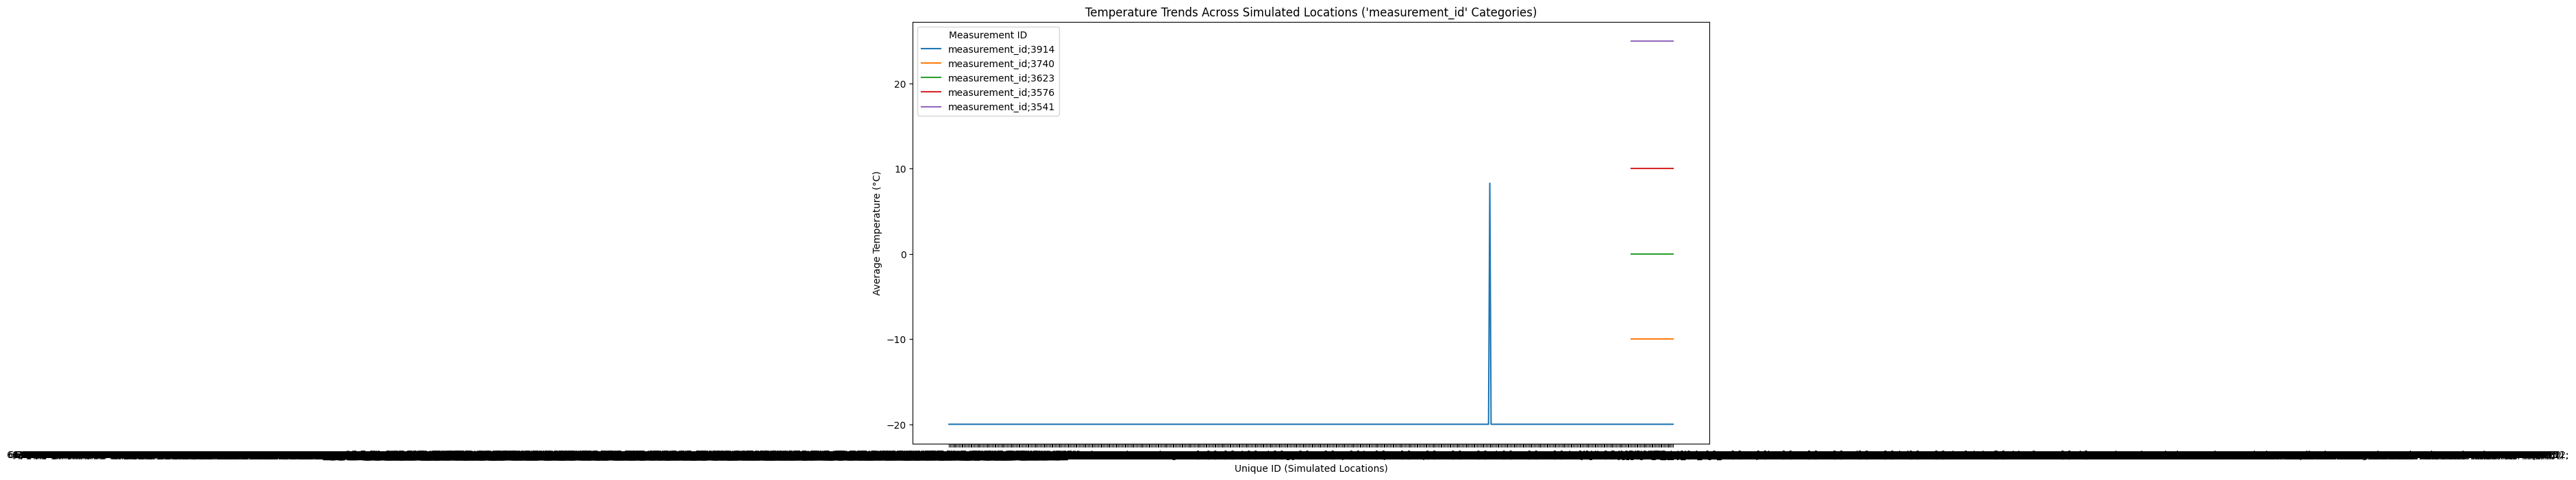

In [ ]:
# Calculated the average temperature for each unique 'measurement_id' to simulate "location" analysis

# Created a new dataframe to hold the average temperatures for each 'measurement_id' category
location_temperature_df = pd.DataFrame()

# For each 'measurement_id' column, calculate the mean temperature and add it to the new dataframe
for col in ['measurement_id;3914', 'measurement_id;3740', 'measurement_id;3623', 'measurement_id;3576', 'measurement_id;3541']:
    location_temperature_df[col] = correct_df.groupby(col)['temperature_degc'].mean()

# Visualized the temperature trends across these simulated locations
plt.figure(figsize=(15, 8))

# Used lineplot to visualize trends across each 'measurement_id' column
for col in location_temperature_df.columns:
    sns.lineplot(x=location_temperature_df.index, y=location_temperature_df[col], label=col)

plt.title("Temperature Trends Across Simulated Locations ('measurement_id' Categories)")
plt.xlabel("Unique ID (Simulated Locations)")
plt.ylabel("Average Temperature (°C)")
plt.legend(title="Measurement ID")
plt.show()


In [ ]:
pip install tensorflow

In [ ]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.model_selection import train_test_split

# Selected relevant columns for LSTM modeling
# Assuming 'temperature_degc' is a key feature and using it for SoC estimation
# In actual scenarios, current, voltage, and other features would be used but here we dint.

# Normalize the temperature data for LSTM
scaler = MinMaxScaler()
temperature_scaled = scaler.fit_transform(correct_df[['temperature_degc']])



In [ ]:
# Prepare sequences for LSTM
def create_sequences(data, seq_length):
    x = []
    y = []
    for i in range(seq_length, len(data)):
        x.append(data[i-seq_length:i, 0])
        y.append(data[i, 0])
    return np.array(x), np.array(y)



In [ ]:
# Define sequence length
sequence_length = 10  # You can adjust this based on the temporal aspect

# Create sequences for LSTM
X, y = create_sequences(temperature_scaled, sequence_length)

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Reshape X for LSTM input [samples, time steps, features]
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# Build LSTM Model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(50))
model.add(Dropout(0.2))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the LSTM model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Predict using the LSTM model
y_pred = model.predict(X_test)

# Inverse transform the predictions and true values
y_test_inverse = scaler.inverse_transform(y_test.reshape(-1, 1))
y_pred_inverse = scaler.inverse_transform(y_pred)



/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
82/82 ━━━━━━━━━━━━━━━━━━━━ 9s 42ms/step - loss: 0.1143 - val_loss: 7.1301e-04
Epoch 2/10
82/82 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.0045 - val_loss: 9.6267e-04
Epoch 3/10
82/82 ━━━━━━━━━━━━━━━━━━━━ 3s 40ms/step - loss: 0.0037 - val_loss: 6.2441e-04
Epoch 4/10
82/82 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 0.0039 - val_loss: 8.5218e-04
Epoch 5/10
82/82 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0031 - val_loss: 7.0433e-04
Epoch 6/10
82/82 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 0.0034 - val_loss: 0.0017
Epoch 7/10
82/82 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - loss: 0.0034 - val_loss: 6.2741e-04
Epoch 8/10
82/82 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0028 - val_loss: 8.9554e-04
Epoch 9/10
82/82 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 0.0026 - val_loss: 8.0506e-04
Epoch 10/10
82/82 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.0028 - val_loss: 6.6631e-04
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step


In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Calculate MSE and RMSE
mse = mean_squared_error(y_test_inverse, y_pred_inverse)
rmse = np.sqrt(mse)

# Calculate R-squared
r2 = r2_score(y_test_inverse, y_pred_inverse)

# Display the metrics
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R-squared (R²): {r2:.4f}")


Mean Squared Error (MSE): 1.3493
Root Mean Squared Error (RMSE): 1.1616
R-squared (R²): 0.9949


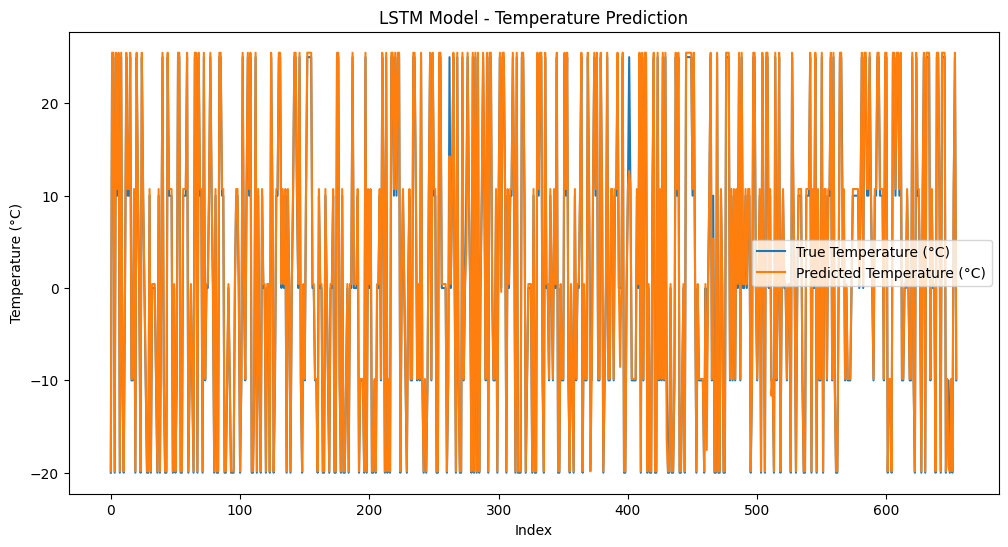

In [ ]:
# Plot the predicted SoC vs True SoC
plt.figure(figsize=(12, 6))
plt.plot(y_test_inverse, label='True Temperature (°C)')
plt.plot(y_pred_inverse, label='Predicted Temperature (°C)')
plt.title("LSTM Model - Temperature Prediction")
plt.xlabel("Index")
plt.ylabel("Temperature (°C)")
plt.legend()
plt.show()


GRU

In [ ]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense, Dropout
from sklearn.model_selection import train_test_split

# Normalize the temperature data for GRU
scaler = MinMaxScaler()
temperature_scaled = scaler.fit_transform(correct_df[['temperature_degc']])

# Prepare sequences for GRU
def create_sequences(data, seq_length):
    x = []
    y = []
    for i in range(seq_length, len(data)):
        x.append(data[i-seq_length:i, 0])
        y.append(data[i, 0])
    return np.array(x), np.array(y)



In [ ]:
# Define sequence length
sequence_length = 10  # You can adjust this based on the temporal aspect

# Create sequences for GRU
X, y = create_sequences(temperature_scaled, sequence_length)

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Reshape X for GRU input [samples, time steps, features]
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# Build GRU Model
model = Sequential()
model.add(GRU(50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(GRU(50))
model.add(Dropout(0.2))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the GRU model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Predict using the GRU model
y_pred = model.predict(X_test)

# Inverse transform the predictions and true values
y_test_inverse = scaler.inverse_transform(y_test.reshape(-1, 1))
y_pred_inverse = scaler.inverse_transform(y_pred)



Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


82/82 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.1102 - val_loss: 4.7958e-04
Epoch 2/10
82/82 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 0.0047 - val_loss: 4.5921e-04
Epoch 3/10
82/82 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - loss: 0.0044 - val_loss: 4.8619e-04
Epoch 4/10
82/82 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0037 - val_loss: 3.4529e-04
Epoch 5/10
82/82 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0034 - val_loss: 3.8897e-04
Epoch 6/10
82/82 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0028 - val_loss: 5.4121e-04
Epoch 7/10
82/82 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0033 - val_loss: 0.0016
Epoch 8/10
82/82 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0029 - val_loss: 5.7712e-04
Epoch 9/10
82/82 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0028 - val_loss: 3.7726e-04
Epoch 10/10
82/82 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0027 - val_loss: 3.6930e-04
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step


In [ ]:
# Calculate evaluation metrics
from sklearn.metrics import mean_squared_error, r2_score

# Calculate MSE and RMSE
mse = mean_squared_error(y_test_inverse, y_pred_inverse)
rmse = np.sqrt(mse)

# Calculate R-squared
r2 = r2_score(y_test_inverse, y_pred_inverse)

# Display the metrics
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R-squared (R²): {r2:.4f}")



Mean Squared Error (MSE): 0.7478
Root Mean Squared Error (RMSE): 0.8648
R-squared (R²): 0.9972


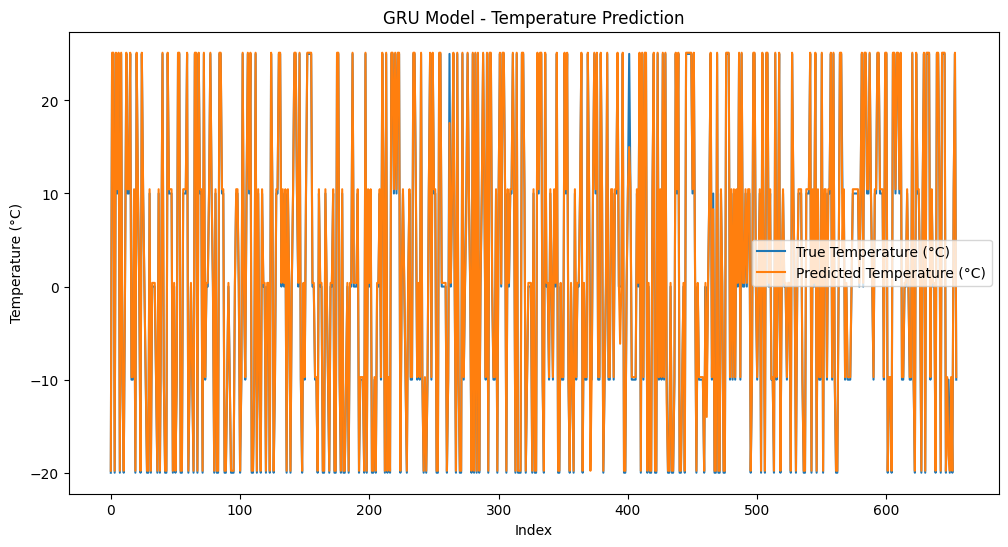

In [ ]:
# Plot the predicted SoC vs True SoC
plt.figure(figsize=(12, 6))
plt.plot(y_test_inverse, label='True Temperature (°C)')
plt.plot(y_pred_inverse, label='Predicted Temperature (°C)')
plt.title("GRU Model - Temperature Prediction")
plt.xlabel("Index")
plt.ylabel("Temperature (°C)")
plt.legend()
plt.show()


Comparing GRU with LSTM


In [ ]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, GRU, Dense, Dropout
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Normalize the temperature data for LSTM and GRU
scaler = MinMaxScaler()
temperature_scaled = scaler.fit_transform(correct_df[['temperature_degc']])

# Prepare sequences for LSTM and GRU
def create_sequences(data, seq_length):
    x = []
    y = []
    for i in range(seq_length, len(data)):
        x.append(data[i-seq_length:i, 0])
        y.append(data[i, 0])
    return np.array(x), np.array(y)

# Define sequence length
sequence_length = 10  # You can adjust this based on the temporal aspect

# Create sequences
X, y = create_sequences(temperature_scaled, sequence_length)

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Reshape X for model input [samples, time steps, features]
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# Build LSTM Model
lstm_model = Sequential()
lstm_model.add(LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
lstm_model.add(Dropout(0.2))
lstm_model.add(LSTM(50))
lstm_model.add(Dropout(0.2))
lstm_model.add(Dense(1))

# Compile the LSTM model
lstm_model.compile(optimizer='adam', loss='mean_squared_error')

# Train the LSTM model
lstm_history = lstm_model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Predict using the LSTM model
y_lstm_pred = lstm_model.predict(X_test)




Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


82/82 ━━━━━━━━━━━━━━━━━━━━ 6s 17ms/step - loss: 0.1021 - val_loss: 7.3962e-04
Epoch 2/10
82/82 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0046 - val_loss: 6.3191e-04
Epoch 3/10
82/82 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0035 - val_loss: 6.0480e-04
Epoch 4/10
82/82 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0032 - val_loss: 8.9485e-04
Epoch 5/10
82/82 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0030 - val_loss: 7.8880e-04
Epoch 6/10
82/82 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0033 - val_loss: 6.6399e-04
Epoch 7/10
82/82 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0026 - val_loss: 0.0012
Epoch 8/10
82/82 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0028 - val_loss: 0.0010
Epoch 9/10
82/82 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0025 - val_loss: 9.2241e-04
Epoch 10/10
82/82 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0026 - val_loss: 7.4057e-04
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step


In [ ]:
# Build GRU Model
gru_model = Sequential()
gru_model.add(GRU(50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
gru_model.add(Dropout(0.2))
gru_model.add(GRU(50))
gru_model.add(Dropout(0.2))
gru_model.add(Dense(1))

# Compile the GRU model
gru_model.compile(optimizer='adam', loss='mean_squared_error')

# Train the GRU model
gru_history = gru_model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Predict using the GRU model
y_gru_pred = gru_model.predict(X_test)

# Inverse transform the predictions and true values for both models
y_test_inverse = scaler.inverse_transform(y_test.reshape(-1, 1))
y_lstm_pred_inverse = scaler.inverse_transform(y_lstm_pred)
y_gru_pred_inverse = scaler.inverse_transform(y_gru_pred)

#Now to compare which is the better performing model we need to calculate their scores
# Calculated evaluation metrics for LSTM below here
mse_lstm = mean_squared_error(y_test_inverse, y_lstm_pred_inverse)
rmse_lstm = np.sqrt(mse_lstm)
r2_lstm = r2_score(y_test_inverse, y_lstm_pred_inverse)

# Calculated evaluation metrics for GRU below here
mse_gru = mean_squared_error(y_test_inverse, y_gru_pred_inverse)
rmse_gru = np.sqrt(mse_gru)
r2_gru = r2_score(y_test_inverse, y_gru_pred_inverse)

print(f"LSTM - MSE: {mse_lstm:.4f}, RMSE: {rmse_lstm:.4f}, R²: {r2_lstm:.4f}")
print(f"GRU - MSE: {mse_gru:.4f}, RMSE: {rmse_gru:.4f}, R²: {r2_gru:.4f}")



Epoch 1/10
82/82 ━━━━━━━━━━━━━━━━━━━━ 6s 20ms/step - loss: 0.0952 - val_loss: 7.9619e-04
Epoch 2/10
82/82 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0048 - val_loss: 5.2294e-04
Epoch 3/10
82/82 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0043 - val_loss: 9.2292e-04
Epoch 4/10
82/82 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0037 - val_loss: 3.5165e-04
Epoch 5/10
82/82 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 0.0035 - val_loss: 5.2622e-04
Epoch 6/10
82/82 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0030 - val_loss: 5.3480e-04
Epoch 7/10
82/82 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0030 - val_loss: 8.9168e-04
Epoch 8/10
82/82 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0029 - val_loss: 3.7381e-04
Epoch 9/10
82/82 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0031 - val_loss: 3.9669e-04
Epoch 10/10
82/82 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0026 - val_loss: 4.7481e-04
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step
LSTM - MSE: 1.4996, RMSE: 1.2246, R²: 0.9943
GRU - MSE: 0.9615, RMSE:

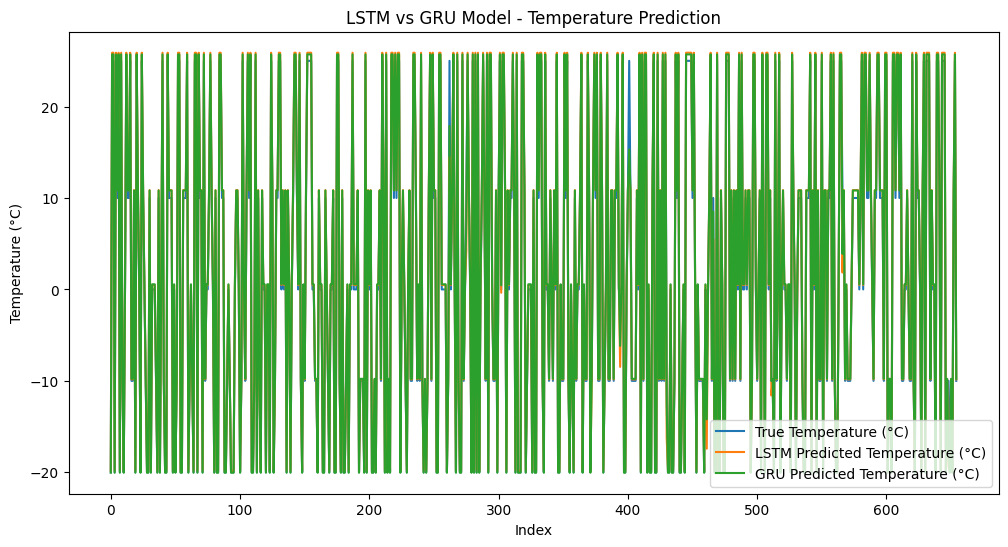

In [ ]:
# Plotted the predicted SoC vs True SoC for LSTM and GRU in viz
plt.figure(figsize=(12, 6))
plt.plot(y_test_inverse, label='True Temperature (°C)')
plt.plot(y_lstm_pred_inverse, label='LSTM Predicted Temperature (°C)')
plt.plot(y_gru_pred_inverse, label='GRU Predicted Temperature (°C)')
plt.title("LSTM vs GRU Model - Temperature Prediction")
plt.xlabel("Index")
plt.ylabel("Temperature (°C)")
plt.legend()
plt.show()



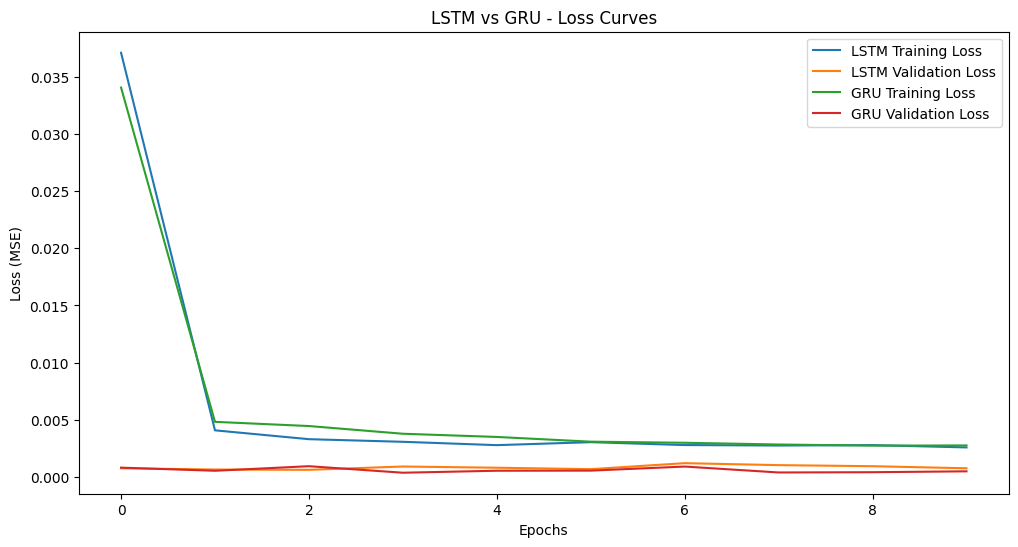

In [ ]:
# Plotted loss curves for both models so it is easy for us to compare
plt.figure(figsize=(12, 6))
plt.plot(lstm_history.history['loss'], label='LSTM Training Loss')
plt.plot(lstm_history.history['val_loss'], label='LSTM Validation Loss')
plt.plot(gru_history.history['loss'], label='GRU Training Loss')
plt.plot(gru_history.history['val_loss'], label='GRU Validation Loss')
plt.title("LSTM vs GRU - Loss Curves")
plt.xlabel("Epochs")
plt.ylabel("Loss (MSE)")
plt.legend()
plt.show()

Checking a few parameters

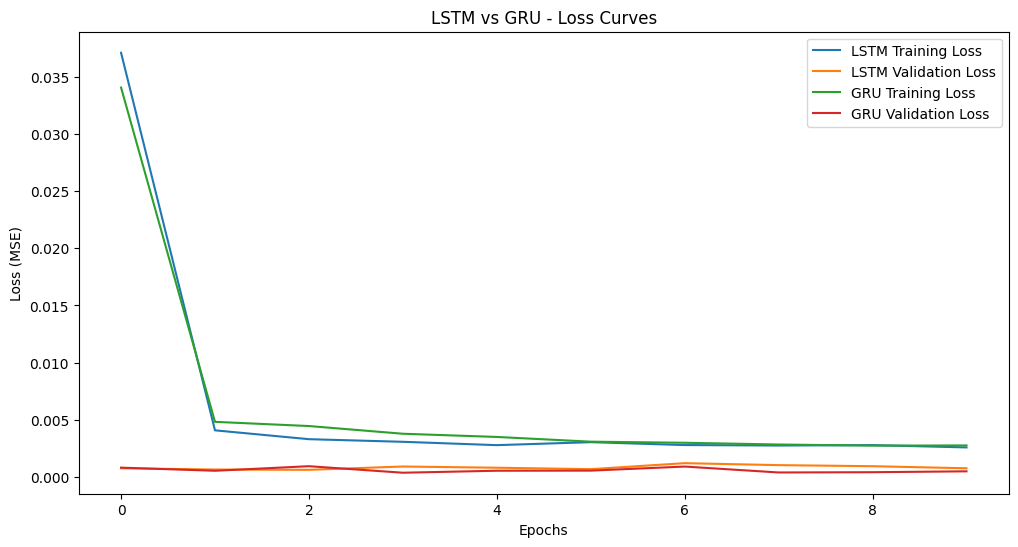

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# 1. Loss Curves Comparison
plt.figure(figsize=(12, 6))
plt.plot(lstm_history.history['loss'], label='LSTM Training Loss')
plt.plot(lstm_history.history['val_loss'], label='LSTM Validation Loss')
plt.plot(gru_history.history['loss'], label='GRU Training Loss')
plt.plot(gru_history.history['val_loss'], label='GRU Validation Loss')
plt.title("LSTM vs GRU - Loss Curves")
plt.xlabel("Epochs")
plt.ylabel("Loss (MSE)")
plt.legend()
plt.show()



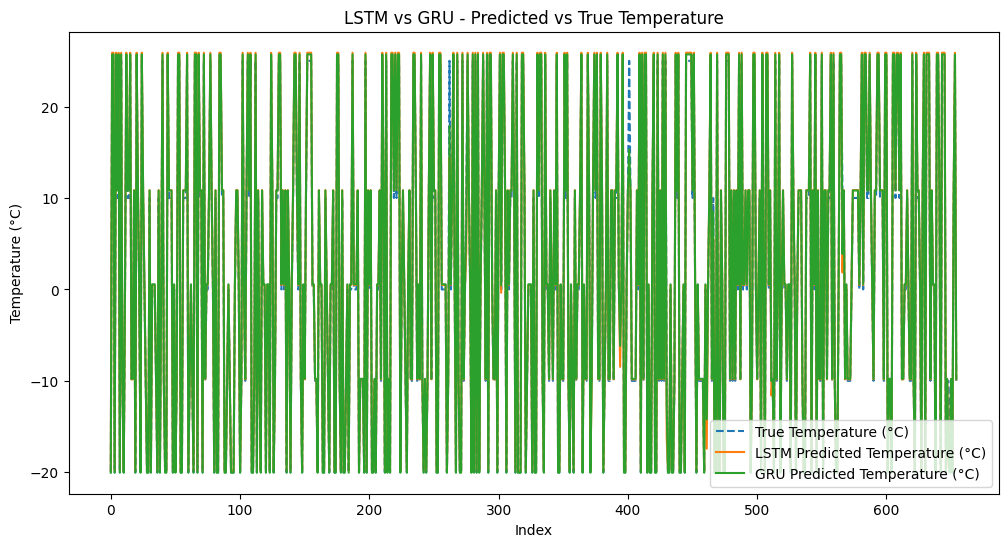

In [ ]:
# 2. Predicted vs True Values
plt.figure(figsize=(12, 6))
plt.plot(y_test_inverse, label='True Temperature (°C)', linestyle='--')
plt.plot(y_lstm_pred_inverse, label='LSTM Predicted Temperature (°C)')
plt.plot(y_gru_pred_inverse, label='GRU Predicted Temperature (°C)')
plt.title("LSTM vs GRU - Predicted vs True Temperature")
plt.xlabel("Index")
plt.ylabel("Temperature (°C)")
plt.legend()
plt.show()



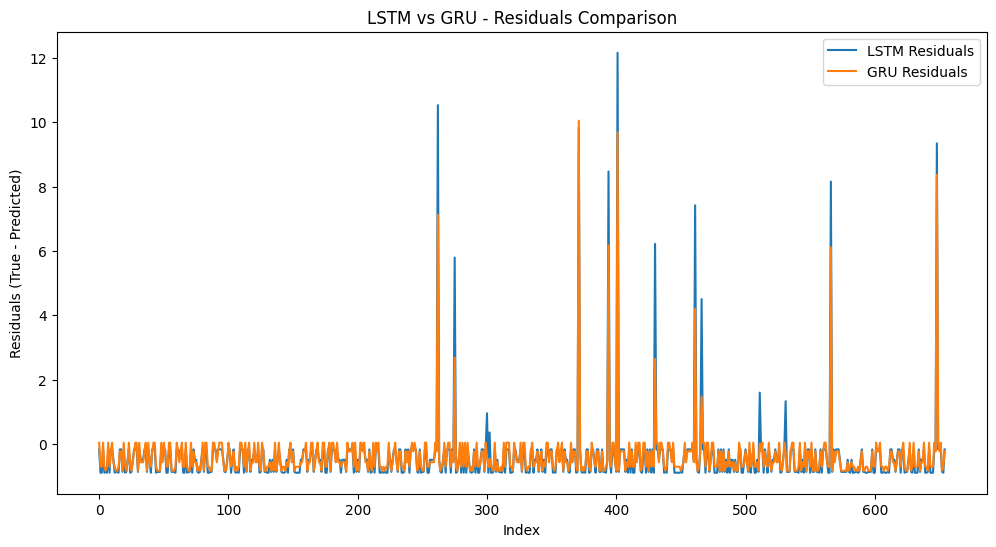

In [ ]:
# 3. Residuals Comparison
lstm_residuals = y_test_inverse - y_lstm_pred_inverse
gru_residuals = y_test_inverse - y_gru_pred_inverse

plt.figure(figsize=(12, 6))
plt.plot(lstm_residuals, label='LSTM Residuals')
plt.plot(gru_residuals, label='GRU Residuals')
plt.title("LSTM vs GRU - Residuals Comparison")
plt.xlabel("Index")
plt.ylabel("Residuals (True - Predicted)")
plt.legend()
plt.show()

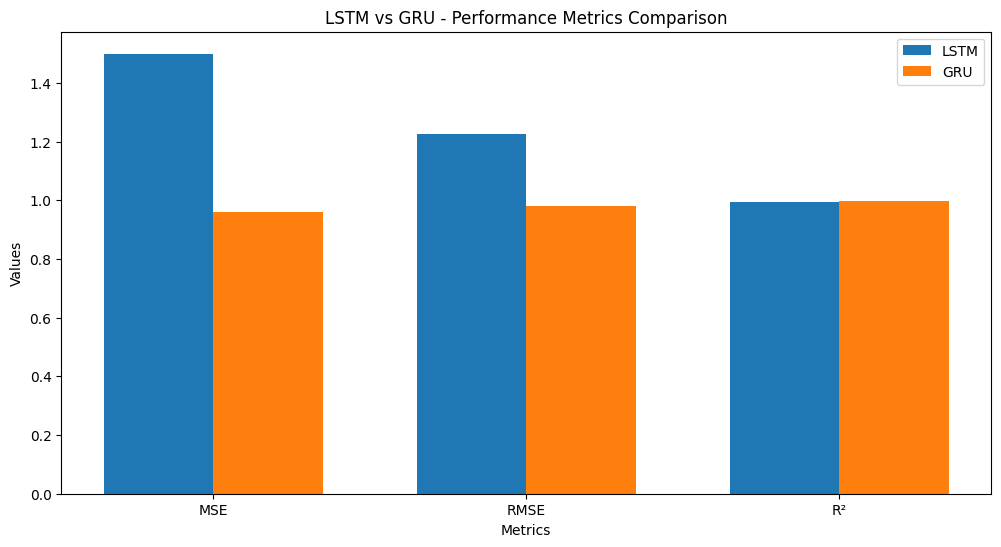

In [ ]:
# 4. Performance Metrics Comparison
metrics = ['MSE', 'RMSE', 'R²']
lstm_metrics = [mse_lstm, rmse_lstm, r2_lstm]
gru_metrics = [mse_gru, rmse_gru, r2_gru]

x = np.arange(len(metrics))
width = 0.35  # width of the bars

plt.figure(figsize=(12, 6))
plt.bar(x - width/2, lstm_metrics, width, label='LSTM')
plt.bar(x + width/2, gru_metrics, width, label='GRU')
plt.title("LSTM vs GRU - Performance Metrics Comparison")
plt.xlabel("Metrics")
plt.ylabel("Values")
plt.xticks(x, metrics)
plt.legend()
plt.show()

#Comparing BI-LSTM

In [ ]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, GRU, Bidirectional, Dense, Dropout
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Data Preparation: Normalize and create sequences
scaler = MinMaxScaler()
temperature_scaled = scaler.fit_transform(correct_df[['temperature_degc']])



In [ ]:
def create_sequences(data, seq_length):
    x = []
    y = []
    for i in range(seq_length, len(data)):
        x.append(data[i-seq_length:i, 0])
        y.append(data[i, 0])
    return np.array(x), np.array(y)



In [ ]:
sequence_length = 10  # Adjust based on temporal aspect

X, y = create_sequences(temperature_scaled, sequence_length)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# Build Bi-LSTM Model
bi_lstm_model = Sequential()
bi_lstm_model.add(Bidirectional(LSTM(50, return_sequences=True), input_shape=(X_train.shape[1], 1)))
bi_lstm_model.add(Dropout(0.2))
bi_lstm_model.add(Bidirectional(LSTM(50)))
bi_lstm_model.add(Dropout(0.2))
bi_lstm_model.add(Dense(1))

# Compile the Bi-LSTM model
bi_lstm_model.compile(optimizer='adam', loss='mean_squared_error')

# Train the Bi-LSTM model
bi_lstm_history = bi_lstm_model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Predict using the Bi-LSTM model
y_bi_lstm_pred = bi_lstm_model.predict(X_test)

# Predict using the LSTM and GRU models (Assuming they are already trained)
# y_lstm_pred and y_gru_pred should be defined after training LSTM and GRU

# Inverse transform the predictions and true values for all models
y_test_inverse = scaler.inverse_transform(y_test.reshape(-1, 1))
y_lstm_pred_inverse = scaler.inverse_transform(y_lstm_pred)
y_gru_pred_inverse = scaler.inverse_transform(y_gru_pred)
y_bi_lstm_pred_inverse = scaler.inverse_transform(y_bi_lstm_pred)

# Calculate evaluation metrics for Bi-LSTM
mse_bi_lstm = mean_squared_error(y_test_inverse, y_bi_lstm_pred_inverse)
rmse_bi_lstm = np.sqrt(mse_bi_lstm)
r2_bi_lstm = r2_score(y_test_inverse, y_bi_lstm_pred_inverse)

# Display metrics for all models
print(f"LSTM - MSE: {mse_lstm:.4f}, RMSE: {rmse_lstm:.4f}, R²: {r2_lstm:.4f}")
print(f"GRU - MSE: {mse_gru:.4f}, RMSE: {rmse_gru:.4f}, R²: {r2_gru:.4f}")
print(f"Bi-LSTM - MSE: {mse_bi_lstm:.4f}, RMSE: {rmse_bi_lstm:.4f}, R²: {r2_bi_lstm:.4f}")



Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


82/82 ━━━━━━━━━━━━━━━━━━━━ 9s 29ms/step - loss: 0.0690 - val_loss: 6.4824e-04
Epoch 2/10
82/82 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - loss: 0.0026 - val_loss: 6.9656e-04
Epoch 3/10
82/82 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - loss: 0.0023 - val_loss: 6.9574e-04
Epoch 4/10
82/82 ━━━━━━━━━━━━━━━━━━━━ 5s 56ms/step - loss: 0.0018 - val_loss: 5.4509e-04
Epoch 5/10
82/82 ━━━━━━━━━━━━━━━━━━━━ 3s 41ms/step - loss: 0.0018 - val_loss: 5.5460e-04
Epoch 6/10
82/82 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - loss: 0.0018 - val_loss: 5.5892e-04
Epoch 7/10
82/82 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 0.0014 - val_loss: 5.4586e-04
Epoch 8/10
82/82 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 0.0016 - val_loss: 5.3609e-04
Epoch 9/10
82/82 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 0.0017 - val_loss: 8.2524e-04
Epoch 10/10
82/82 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - loss: 0.0015 - val_loss: 5.3006e-04
21/21 ━━━━━━━━━━━━━━━━━━━━ 2s 50ms/step
LSTM - MSE: 1.4996, RMSE: 1.2246, R²: 0.9943
GRU - MSE: 0.9615, RMSE: 0.9806, R²

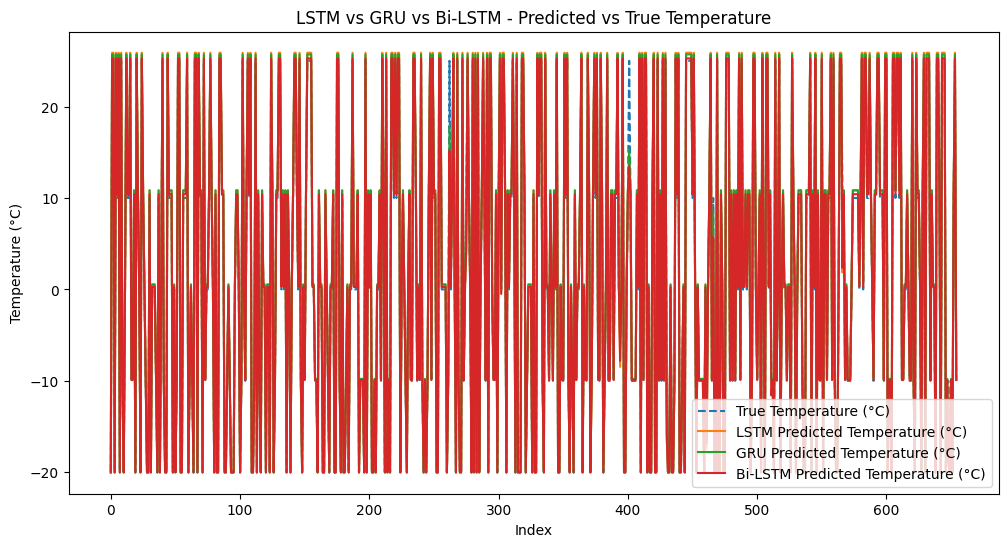

In [ ]:
# Plot the predicted SoC vs True SoC for LSTM, GRU, and Bi-LSTM
plt.figure(figsize=(12, 6))
plt.plot(y_test_inverse, label='True Temperature (°C)', linestyle='--')
plt.plot(y_lstm_pred_inverse, label='LSTM Predicted Temperature (°C)')
plt.plot(y_gru_pred_inverse, label='GRU Predicted Temperature (°C)')
plt.plot(y_bi_lstm_pred_inverse, label='Bi-LSTM Predicted Temperature (°C)')
plt.title("LSTM vs GRU vs Bi-LSTM - Predicted vs True Temperature")
plt.xlabel("Index")
plt.ylabel("Temperature (°C)")
plt.legend()
plt.show()



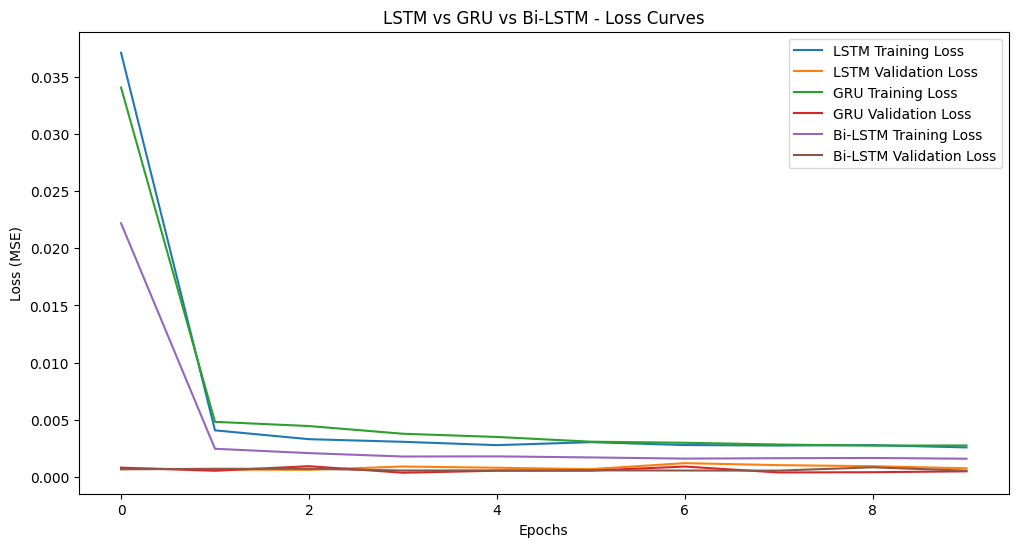

In [ ]:
# Plot loss curves for all models
plt.figure(figsize=(12, 6))
plt.plot(lstm_history.history['loss'], label='LSTM Training Loss')
plt.plot(lstm_history.history['val_loss'], label='LSTM Validation Loss')
plt.plot(gru_history.history['loss'], label='GRU Training Loss')
plt.plot(gru_history.history['val_loss'], label='GRU Validation Loss')
plt.plot(bi_lstm_history.history['loss'], label='Bi-LSTM Training Loss')
plt.plot(bi_lstm_history.history['val_loss'], label='Bi-LSTM Validation Loss')
plt.title("LSTM vs GRU vs Bi-LSTM - Loss Curves")
plt.xlabel("Epochs")
plt.ylabel("Loss (MSE)")
plt.legend()
plt.show()



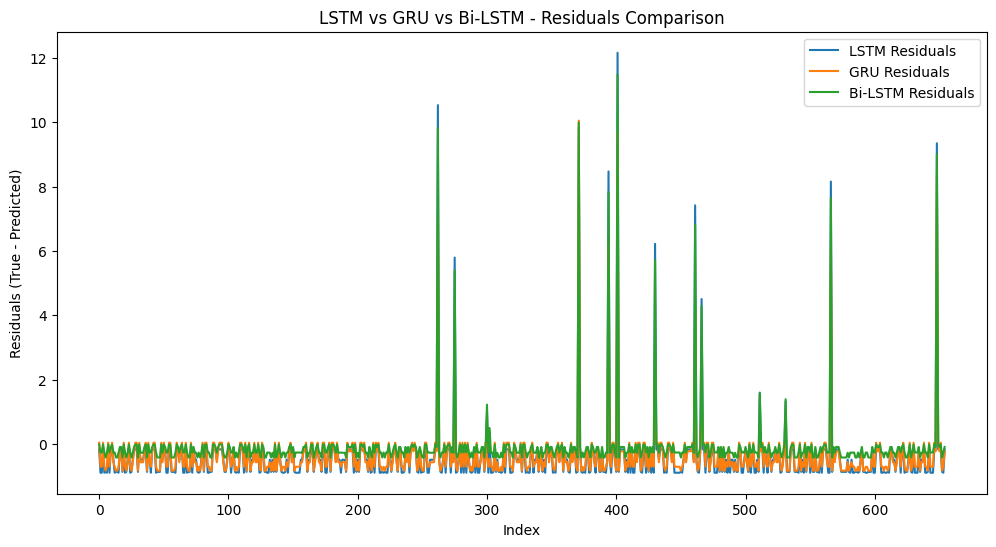

In [ ]:
# Residuals Comparison
bi_lstm_residuals = y_test_inverse - y_bi_lstm_pred_inverse

plt.figure(figsize=(12, 6))
plt.plot(lstm_residuals, label='LSTM Residuals')
plt.plot(gru_residuals, label='GRU Residuals')
plt.plot(bi_lstm_residuals, label='Bi-LSTM Residuals')
plt.title("LSTM vs GRU vs Bi-LSTM - Residuals Comparison")
plt.xlabel("Index")
plt.ylabel("Residuals (True - Predicted)")
plt.legend()
plt.show()


#Comparing MGU

In [ ]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, GRU, Dense, Dropout, Layer
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import tensorflow as tf

# # Define MGU (Minimal Gated Unit) Layer
# class MinimalGatedUnit(Layer):
#     def __init__(self, units):
#         super(MinimalGatedUnit, self).__init__()
#         self.units = units
#         self.rnn_cell = tf.keras.layers.GRUCell(units)
#         self.update_gate = tf.keras.layers.Dense(units, activation='sigmoid')

#     def call(self, inputs, states):
#         h_prev = states[0]
#         z = self.update_gate(tf.concat([inputs, h_prev], axis=-1))
#         h_next, _ = self.rnn_cell(inputs, states)
#         h_next = z * h_prev + (1 - z) * h_next
#         return h_next, [h_next]



Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/layer.py:372: UserWarning: `build()` was called on layer 'minimal_gated_unit_4', however the layer does not have a `build()` method implemented and it looks like it has unbuilt state. This will cause the layer to be marked as built, despite not being actually built, which may cause failures down the line. Make sure to implement a proper `build()` method.
  warnings.warn(


82/82 ━━━━━━━━━━━━━━━━━━━━ 6s 22ms/step - loss: 0.1140 - val_loss: 0.0012
Epoch 2/10
82/82 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0056 - val_loss: 4.8887e-04
Epoch 3/10
82/82 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0050 - val_loss: 4.4855e-04
Epoch 4/10
82/82 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0042 - val_loss: 5.7224e-04
Epoch 5/10
82/82 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0035 - val_loss: 4.7822e-04
Epoch 6/10
82/82 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0030 - val_loss: 4.6940e-04
Epoch 7/10
82/82 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0029 - val_loss: 6.1001e-04
Epoch 8/10
82/82 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0026 - val_loss: 5.3232e-04
Epoch 9/10
82/82 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0026 - val_loss: 4.0619e-04
Epoch 10/10
82/82 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0023 - val_loss: 4.3914e-04
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step
MGU - MSE: 0.8893, RMSE: 0.9430, R²: 0.9966
LSTM - MSE: 1.4996, RMSE: 1.2246, R²: 0.9943
GRU

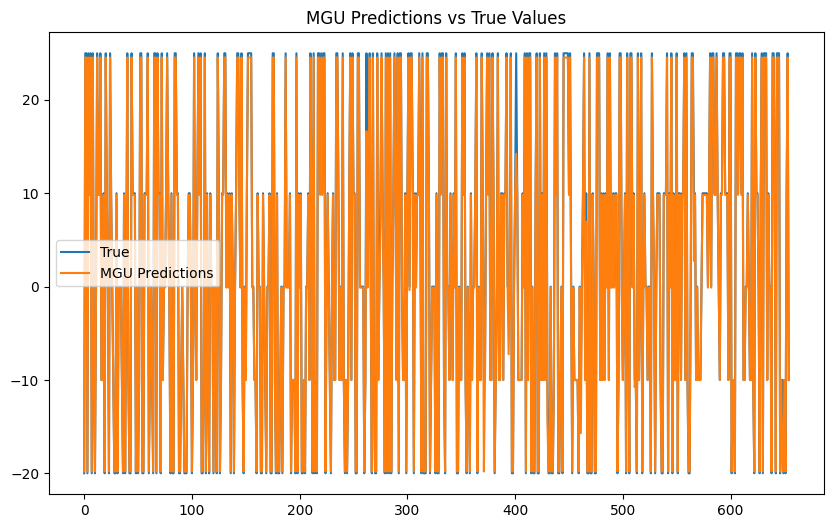

In [ ]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, GRU, Dense, Dropout, Layer
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import tensorflow as tf

import tensorflow as tf
from tensorflow.keras.layers import Layer

# Define MGU (Minimal Gated Unit) Layer
class MinimalGatedUnit(Layer):
    def __init__(self, units):
        super(MinimalGatedUnit, self).__init__()
        self.units = units
        self.rnn_cell = tf.keras.layers.GRUCell(units)
        self.update_gate = tf.keras.layers.Dense(units, activation='sigmoid')

    def call(self, inputs, states):
        h_prev = states[0]
        z = self.update_gate(tf.concat([inputs, h_prev], axis=-1))
        h_next, _ = self.rnn_cell(inputs, states)
        h_next = z * h_prev + (1 - z) * h_next
        return h_next, [h_next]

    @property
    def state_size(self):
        return self.units

    @property
    def output_size(self):
        return self.units


# Build the MGU model
def build_mgu_model(input_shape):
    model = Sequential()
    model.add(tf.keras.layers.RNN(MinimalGatedUnit(50), input_shape=input_shape))
    model.add(Dropout(0.2))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

# Data Preparation: Normalize and create sequences
scaler = MinMaxScaler()
temperature_scaled = scaler.fit_transform(correct_df[['temperature_degc']])  # Assuming 'correct_df' exists

# Create sequences for input
def create_sequences(data, seq_length):
    x = []
    y = []
    for i in range(seq_length, len(data)):
        x.append(data[i-seq_length:i, 0])
        y.append(data[i, 0])
    return np.array(x), np.array(y)

sequence_length = 10  # Adjust based on temporal aspect
X, y = create_sequences(temperature_scaled, sequence_length)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Reshape input data to be [samples, time steps, features]
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# Build and Train MGU Model
mgu_model = build_mgu_model((X_train.shape[1], 1))
mgu_history = mgu_model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Predict using the MGU model
y_mgu_pred = mgu_model.predict(X_test)

# Inverse transform the predictions and true values
y_test_inverse = scaler.inverse_transform(y_test.reshape(-1, 1))
y_mgu_pred_inverse = scaler.inverse_transform(y_mgu_pred)

# Calculate evaluation metrics for MGU
mse_mgu = mean_squared_error(y_test_inverse, y_mgu_pred_inverse)
rmse_mgu = np.sqrt(mse_mgu)
r2_mgu = r2_score(y_test_inverse, y_mgu_pred_inverse)

# Display metrics for MGU
print(f"MGU - MSE: {mse_mgu:.4f}, RMSE: {rmse_mgu:.4f}, R²: {r2_mgu:.4f}")

# LSTM and GRU models are already built and evaluated, and predictions are stored in y_lstm_pred_inverse and y_gru_pred_inverse
# Displaying metrics for LSTM and GRU as well for reference

# Uncomment below lines if LSTM and GRU metrics are available
mse_lstm = mean_squared_error(y_test_inverse, y_lstm_pred_inverse)
rmse_lstm = np.sqrt(mse_lstm)
r2_lstm = r2_score(y_test_inverse, y_lstm_pred_inverse)

mse_gru = mean_squared_error(y_test_inverse, y_gru_pred_inverse)
rmse_gru = np.sqrt(mse_gru)
r2_gru = r2_score(y_test_inverse, y_gru_pred_inverse)

print(f"LSTM - MSE: {mse_lstm:.4f}, RMSE: {rmse_lstm:.4f}, R²: {r2_lstm:.4f}")
print(f"GRU - MSE: {mse_gru:.4f}, RMSE: {rmse_gru:.4f}, R²: {r2_gru:.4f}")

# Plot the comparison between actual vs predicted values
plt.figure(figsize=(10, 6))
plt.plot(y_test_inverse, label='True')
plt.plot(y_mgu_pred_inverse, label='MGU Predictions')
plt.title('MGU Predictions vs True Values')
plt.legend()
plt.show()


In [ ]:

# # Build MGU Model
# def build_mgu_model(input_shape):
#     model = tf.keras.Sequential()
#     model.add(tf.keras.layers.RNN(MinimalGatedUnit(50), input_shape=input_shape))
#     model.add(tf.keras.layers.Dropout(0.2))
#     model.add(tf.keras.layers.Dense(1))
#     model.compile(optimizer='adam', loss='mean_squared_error')
#     return model


# # Data Preparation: Normalize and create sequences
# scaler = MinMaxScaler()
# temperature_scaled = scaler.fit_transform(correct_df[['temperature_degc']])

# # Create sequences for input
# def create_sequences(data, seq_length):
#     x = []
#     y = []
#     for i in range(seq_length, len(data)):
#         x.append(data[i-seq_length:i, 0])
#         y.append(data[i, 0])
#     return np.array(x), np.array(y)

# sequence_length = 10  # Adjust based on temporal aspect

# X, y = create_sequences(temperature_scaled, sequence_length)
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
# X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# # Build and Train MGU Model
# mgu_model = build_mgu_model((X_train.shape[1], 1))
# mgu_history = mgu_model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# # Predict using the MGU model
# y_mgu_pred = mgu_model.predict(X_test)

# # Inverse transform the predictions and true values
# y_test_inverse = scaler.inverse_transform(y_test.reshape(-1, 1))
# y_mgu_pred_inverse = scaler.inverse_transform(y_mgu_pred)

# # Calculate evaluation metrics for MGU
# mse_mgu = mean_squared_error(y_test_inverse, y_mgu_pred_inverse)
# rmse_mgu = np.sqrt(mse_mgu)
# r2_mgu = r2_score(y_test_inverse, y_mgu_pred_inverse)

# # Display metrics for MGU
# print(f"MGU - MSE: {mse_mgu:.4f}, RMSE: {rmse_mgu:.4f}, R²: {r2_mgu:.4f}")

# # Compare with LSTM and GRU (Assuming y_lstm_pred_inverse and y_gru_pred_inverse are already defined)
# # Display metrics for LSTM and GRU as well for reference
# print(f"LSTM - MSE: {mse_lstm:.4f}, RMSE: {rmse_lstm:.4f}, R²: {r2_lstm:.4f}")
# print(f"GRU - MSE: {mse_gru:.4f}, RMSE: {rmse_gru:.4f}, R²: {r2_gru:.4f}")



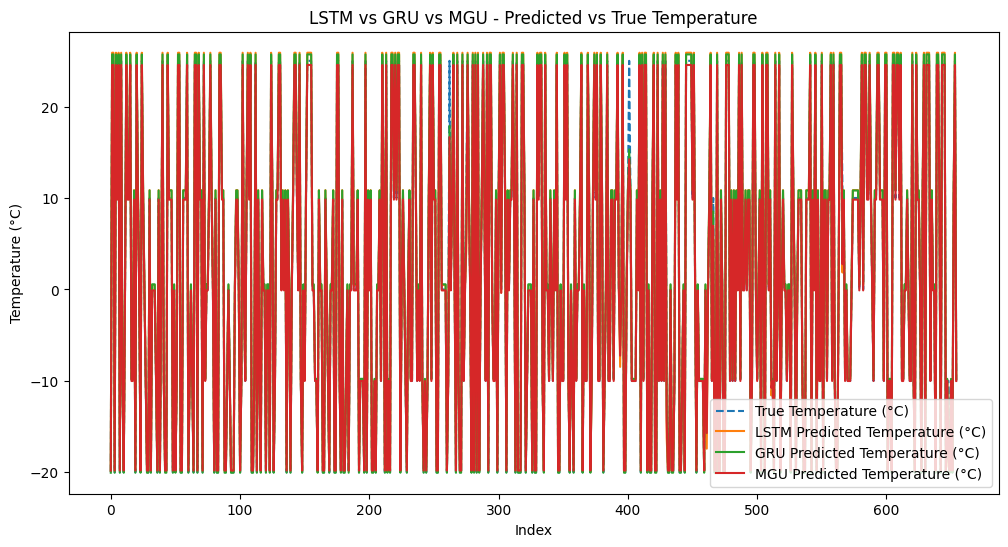

In [ ]:
# Plot the predicted SoC vs True SoC for LSTM, GRU, and MGU
plt.figure(figsize=(12, 6))
plt.plot(y_test_inverse, label='True Temperature (°C)', linestyle='--')
plt.plot(y_lstm_pred_inverse, label='LSTM Predicted Temperature (°C)')
plt.plot(y_gru_pred_inverse, label='GRU Predicted Temperature (°C)')
plt.plot(y_mgu_pred_inverse, label='MGU Predicted Temperature (°C)')
plt.title("LSTM vs GRU vs MGU - Predicted vs True Temperature")
plt.xlabel("Index")
plt.ylabel("Temperature (°C)")
plt.legend()
plt.show()


#ARCHITECTURES - CHECKING

In [ ]:
from tensorflow.keras.utils import plot_model
import matplotlib.pyplot as plt

# Displaying the architecture of the GRU model
print("GRU Model Architecture:")
gru_model = Sequential()
gru_model.add(GRU(50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
gru_model.add(Dropout(0.2))
gru_model.add(GRU(50))
gru_model.add(Dropout(0.2))
gru_model.add(Dense(1))
gru_model.compile(optimizer='adam', loss='mean_squared_error')
gru_model.summary()



GRU Model Architecture:


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ gru_4 (GRU)                          │ (None, 10, 50)              │           7,950 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_11 (Dropout)                 │ (None, 10, 50)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru_5 (GRU)                          │ (None, 50)                  │          15,300 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_12 (Dropout)                 │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 23,301 (91.02 KB)

 Trainable params: 23,301 (91.02 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Display the architecture of the LSTM model (if defined similarly)
print("\nLSTM Model Architecture:")
lstm_model = Sequential()
lstm_model.add(LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
lstm_model.add(Dropout(0.2))
lstm_model.add(LSTM(50))
lstm_model.add(Dropout(0.2))
lstm_model.add(Dense(1))
lstm_model.compile(optimizer='adam', loss='mean_squared_error')
lstm_model.summary()



LSTM Model Architecture:


Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_6 (LSTM)                        │ (None, 10, 50)              │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_13 (Dropout)                 │ (None, 10, 50)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_7 (LSTM)                        │ (None, 50)                  │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_14 (Dropout)                 │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 30,651 (119.73 KB)

 Trainable params: 30,651 (119.73 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:

# Display the architecture of the MGU model (assuming build_mgu_model function is defined)
print("\nMGU Model Architecture:")
mgu_model = build_mgu_model((X_train.shape[1], 1))
mgu_model.summary()




MGU Model Architecture:


/usr/local/lib/python3.10/dist-packages/keras/src/layers/layer.py:372: UserWarning: `build()` was called on layer 'minimal_gated_unit_5', however the layer does not have a `build()` method implemented and it looks like it has unbuilt state. This will cause the layer to be marked as built, despite not being actually built, which may cause failures down the line. Make sure to implement a proper `build()` method.
  warnings.warn(


Model: "sequential_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ rnn_1 (RNN)                          │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_15 (Dropout)                 │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 51 (204.00 B)

 Trainable params: 51 (204.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
bi_lstm_model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ bidirectional (Bidirectional)        │ (None, 10, 100)             │          20,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_8 (Dropout)                  │ (None, 10, 100)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_1 (Bidirectional)      │ (None, 100)                 │          60,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_9 (Dropout)                  │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 1)                   │             101 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 243,905 (952.76 KB)

 Trainable params: 81,301 (317.58 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 162,604 (635.18 KB)

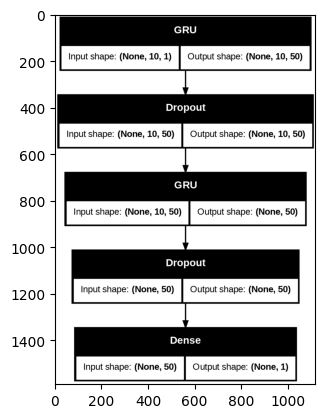

In [ ]:
plot_model(gru_model, to_file='gru_model_architecture.png', show_shapes=True)
plot_model(lstm_model, to_file='lstm_model_architecture.png', show_shapes=True)
plot_model(mgu_model, to_file='mgu_model_architecture.png', show_shapes=True)

img = plt.imread('gru_model_architecture.png')
plt.imshow(img)

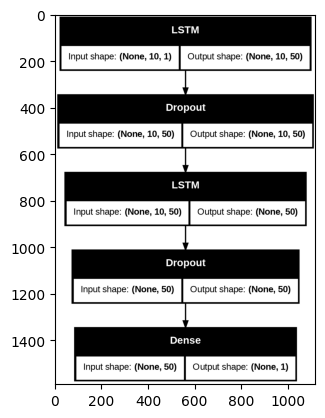

In [ ]:
imgl = plt.imread('lstm_model_architecture.png')
plt.imshow(imgl)

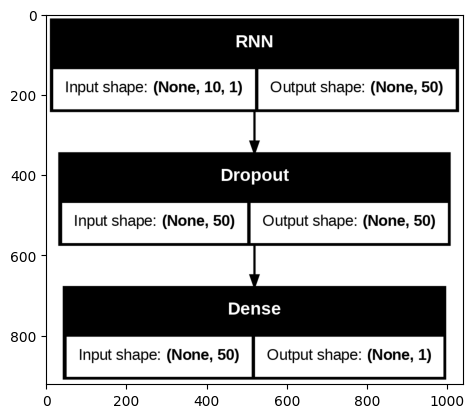

In [ ]:
imgm = plt.imread('mgu_model_architecture.png')
plt.imshow(imgm)

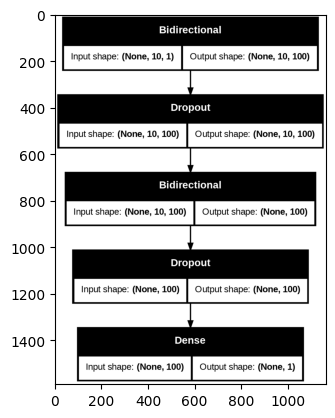

In [ ]:
plot_model(bi_lstm_model, to_file='bi_lstm_model_architecture.png', show_shapes=True)
imgbl = plt.imread('bi_lstm_model_architecture.png')
plt.imshow(imgbl)